In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser

In [2]:
data=pd.read_csv(r"C:\Users\Sagar\Desktop\MentorKart\ML PROJECT\FineTech_appData.csv")

In [3]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [5]:
for i in range(1,4):
    print(data.loc[i,"screen_list"])

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2
Splash,Cycle,Loan
product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2


In [6]:
data["hour"]=data.hour.str.slice(1,3).astype(int)

In [7]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [8]:
data["user"].unique()

array([235136, 333588, 254414, ..., 302367, 324905,  27047], dtype=int64)

In [9]:
users=data.columns
for i,j in enumerate(users):
    print(f"************************************{i+1} DATA IS {[j]}***************************************")
    print(f"Unique value of data{[j]}",data[j].unique())
    print(f"lenth of Unique value of data{[j]}",len(data[j].unique()))
    print("***********************************************************************************************")
    print()

************************************1 DATA IS ['user']***************************************
Unique value of data['user'] [235136 333588 254414 ... 302367 324905  27047]
lenth of Unique value of data['user'] 49874
***********************************************************************************************

************************************2 DATA IS ['first_open']***************************************
Unique value of data['first_open'] ['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
lenth of Unique value of data['first_open'] 49747
***********************************************************************************************

************************************3 DATA IS ['dayofweek']***************************************
Unique value of data['dayofweek'] [3 6 1 4 2 0 5]
lenth of Unique value of data['dayofweek'] 7
************************************************

In [10]:
data.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [11]:
obj=['user', 'first_open', 'screen_list','enrolled_date']
data2=data.drop(columns=obj,axis=1)

In [12]:
data2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


<AxesSubplot:>

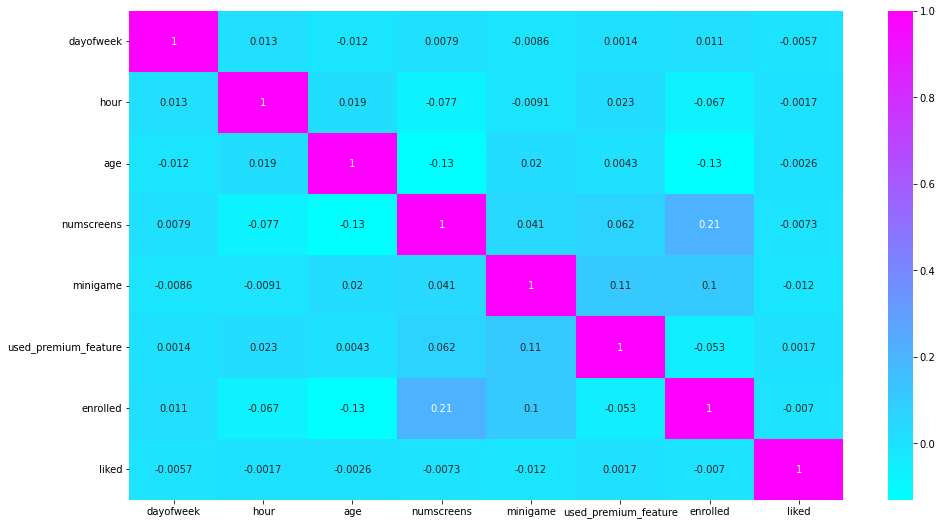

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(data2.corr(),annot=True,cmap="cool")

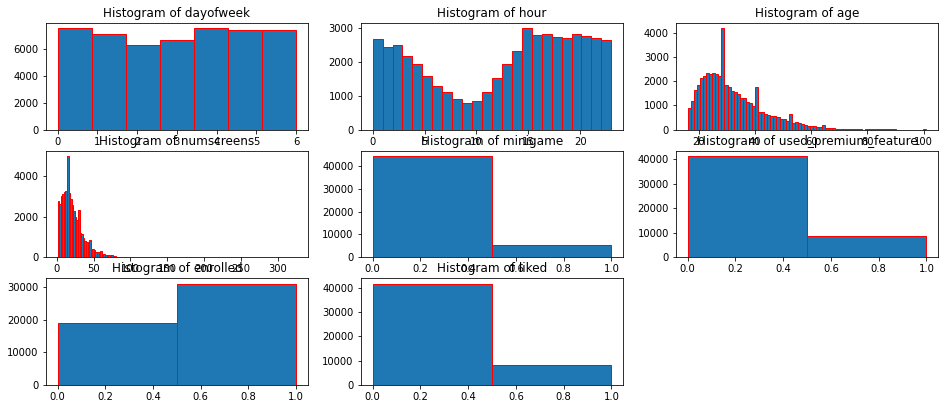

In [14]:
plt.figure(figsize=(16,9))
features2=data2.columns
for i,j in enumerate(features2):
    plt.subplot(4,3,i+1)
    plt.title(f"Histogram of {j}")
    bins=len(data[j].unique())
    plt.hist(data[j],bins=bins,edgecolor="r")

In [15]:
for i,j in enumerate(features2):
    print(f"{i}={j}")

0=dayofweek
1=hour
2=age
3=numscreens
4=minigame
5=used_premium_feature
6=enrolled
7=liked


In [16]:
data["first_open"]=[parser.parse(i) for i in data["first_open"]]

In [17]:
data["enrolled_date"]=[parser.parse(i) if isinstance(i,str) else i for i in data["enrolled_date"]]

In [18]:
data["enrolled_date"]

0                           NaT
1                           NaT
2                           NaT
3       2013-07-05 16:11:49.513
4       2013-02-26 18:56:37.841
                  ...          
49995   2013-05-09 13:47:52.875
49996                       NaT
49997                       NaT
49998   2013-04-28 12:35:38.709
49999                       NaT
Name: enrolled_date, Length: 50000, dtype: datetime64[ns]

In [19]:
data["first_open"]

0       2012-12-27 02:14:51.273
1       2012-12-02 01:16:00.905
2       2013-03-19 19:19:09.157
3       2013-07-05 16:08:46.354
4       2013-02-26 18:50:48.661
                  ...          
49995   2013-05-09 13:46:17.871
49996   2013-04-09 00:05:17.823
49997   2013-02-20 22:41:51.165
49998   2013-04-28 12:33:04.288
49999   2012-12-14 01:22:44.638
Name: first_open, Length: 50000, dtype: datetime64[ns]

In [24]:
data["time_to_enrolled"]=(data.enrolled_date-data.first_open).astype('timedelta64[h]')

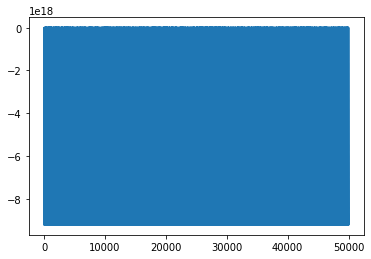

In [21]:
plt.plot(data["time_to_enrolled"])

In [25]:
data.loc[data.time_to_enrolled > 48, 'enrolled'] = 0

In [27]:
data.drop(columns=['enrolled',"time_to_enrolled","first_open"],inplace=True)